## Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import numpy as np

In [61]:
le=LabelEncoder()
df=pd.read_csv('data/dataset.csv')
df.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,...,0.0779,0.845,185.655,173533,3,32.94975,9,1,60,NaN
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,...,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,...,0.1190,0.908,115.940,223960,4,37.22663,12,0,60,NaN
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,...,0.0610,0.967,105.592,157907,4,24.75484,8,0,60,NaN
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,...,0.2130,0.906,114.617,245600,4,21.79874,14,0,60,NaN


## Encoding the data

In [81]:
data_encoded=df[["danceability","energy","key","loudness","mode",
                                 "speechiness","instrumentalness","acousticness","liveness","valence","tempo",
                                 "duration_ms","chorus_hit","decade","genre"]]

data_encoded['n_decade']=le.fit_transform(data_encoded['decade'])
data_encoded['n_genre']=le.fit_transform(data_encoded['genre'])
data_encoded=data_encoded.drop(['genre','decade'],axis=1)
#data_encoded.head(5)

<ipython-input-81-ab4c0b7145a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded['n_decade']=le.fit_transform(data_encoded['decade'])
<ipython-input-81-ab4c0b7145a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded['n_genre']=le.fit_transform(data_encoded['genre'])


array([1406, 1291, 1435, ..., 1590,  963,  909], dtype=int64)

## Splitting the dataset into train and test sets

In [63]:
trainX,testX,trainY,testY=train_test_split(data_encoded.drop('n_genre',axis=1),
                                           data_encoded[['n_genre']])
trainX.head(5)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,n_decade
14533,0.504,0.71900,1,-9.155,0,0.0431,0.001490,0.00878,0.0750,0.177,102.144,386707,47.78909,3
26877,0.704,0.56400,4,-8.191,1,0.0686,0.003840,0.44400,0.1110,0.338,145.996,291573,54.28951,5
25645,0.668,0.26100,7,-13.003,1,0.0405,0.000391,0.58800,0.1160,0.282,147.446,219493,19.93794,5
24901,0.220,0.00792,7,-36.240,1,0.0490,0.250000,0.96400,0.0974,0.147,80.829,245427,31.37379,5
39978,0.768,0.88100,9,-4.392,0,0.1130,0.000004,0.01880,0.2980,0.502,99.980,201238,23.14334,1


In [64]:
nb_model=GaussianNB()
nb_model.fit(trainX,trainY.squeeze())

GaussianNB()

In [65]:
nb_model_predict=nb_model.predict(testX)
result_nb=pd.DataFrame({'actual':testY.n_genre,'predicted':nb_model_predict})
result_nb.head(5)

,actual,predicted
14190,7,9
31939,9,9
29975,3,9
2539,9,9
33426,7,9


In [80]:
conf_matrix_nb=pd.crosstab(le.inverse_transform(result_nb['actual']),
                           le.inverse_transform(result_nb['predicted']),
                           rownames=['Actual'],
                           colnames=['Predicted'])
#conf_matrix=pd.crosstab(le.inverse_transform(result_entropy['actual']),le.inverse_transform(result_entropy['predicted']))
#conf_matrix_nb
np.unique(result_nb['predicted'])

array([1, 4, 5, 6, 8, 9])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

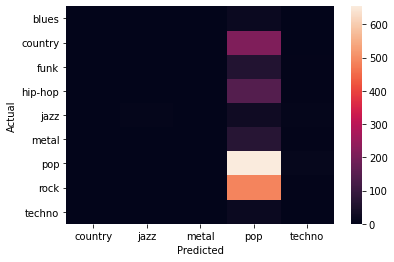

In [67]:
sns.heatmap(conf_matrix_nb)

In [68]:
accuracy_score(result_nb['actual'],result_nb['predicted'])

0.4620998345820765